### TASK - 3 : Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

## PROBLEM STATEMENT

🟣 There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

## Project Description

The project analyzes the prior marketing campaign data of a Portugeuse bank and aims to predict whether the customer will subscribe to fixed-term deposit products the bank is offering. The code cleans the data, imputes the missing values, and analyzes and compares different predictive models. The best predictive model is used for the prediction exercise.

Comments and Explanations (in the form of Markdown) are included in the notebook to improve the readability of the code, to explain the rationale of doing certain steps and to discuss the results and inferences from the executed code.


## IMPORTING LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## IMPORTING DATASET

In [4]:
df=pd.read_csv('C:/Users/Kaiyu/Downloads/bank data.csv',sep=';')
df1=df.copy()

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Dataset Description:**

We have 4118 instances and 21 features. The information says there are no null values. Fishy right? anyway we will strictly scrutinize each feature and check for suspicious records and manipulate them

**Attributes:**
**Bank client data:**

1. **Age** : Age of the lead (numeric)
2. **Job** : type of job (Categorical)
3. **Marital** : Marital status (Categorical)
4. **Education** :  Educational Qualification of the lead (Categorical)
5. **Default:** Does the lead has any default(unpaid)credit (Categorical)
6. **Housing:** Does the lead has any housing loan? (Categorical)
7. **loan:** Does the lead has any personal loan? (Categorical)

**Related with the last contact of the current campaign:**

8. **Contact:** Contact communication type (Categorical)
9. **Month:** last contact month of year (Categorical)
10. **day_of_week:** last contact day of the week (categorical)
11. **duration:** last contact duration, in seconds (numeric).

**Important note:** Duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12. **campaign:** number of contacts performed during this campaign and for this client (numeric)
13. **pdays:** number of days that passed by after the client was last contacted from a previous campaign(numeric; 999 means client was not previously contacted))
14. **previous:** number of contacts performed before this campaign and for this client (numeric)
15. **poutcome:** outcome of the previous marketing campaign (categorical)

**Social and economic context attributes**

16. **emp.var.rate:** employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx:** consumer price index - monthly indicator (numeric)
18. **cons.conf.idx:** consumer confidence index - monthly indicator (numeric)
19. **euribor3m:** euribor 3 month rate - daily indicator (numeric)
20. **nr.employed:** number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')

## Understanding The Dataset

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

🟣 we dont have null values in our data set

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

🟣 some columns are not in proper datatype. As always ,will fix it later on.

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot: >

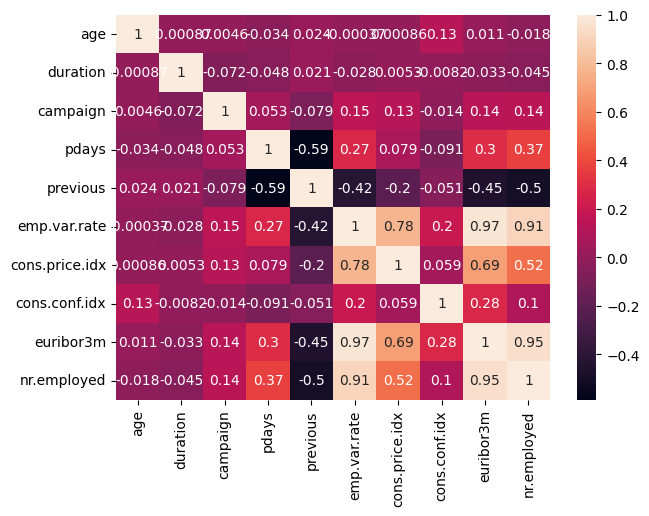

In [10]:
cor_mat=df.corr()
fig = plt.figure(figsize=(7,5))
sns.heatmap(cor_mat,annot=True)

In [11]:
p=list(df.columns)

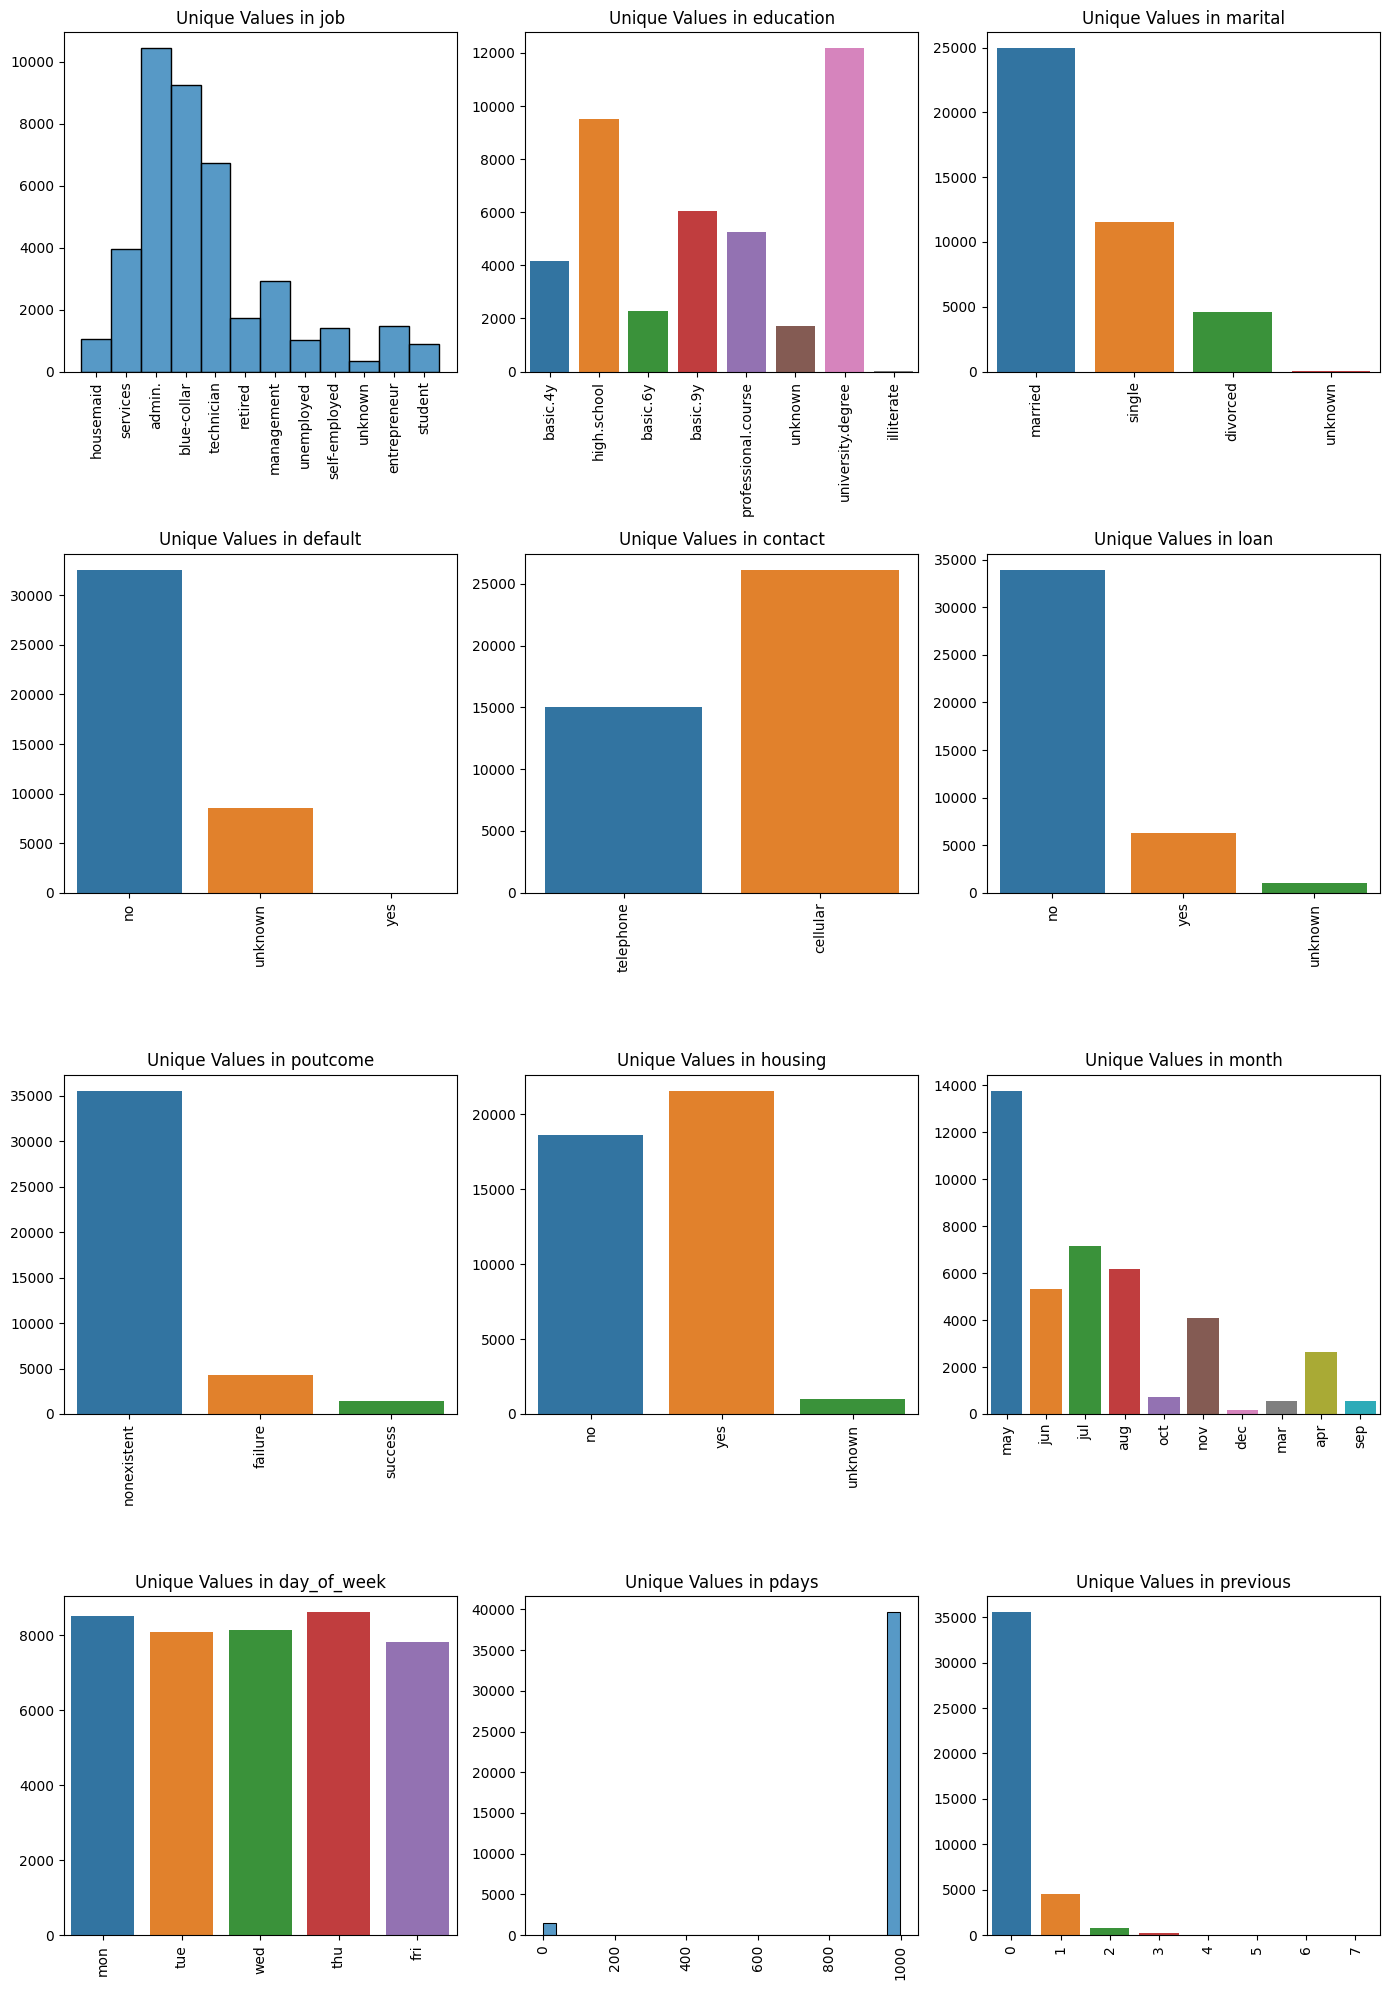

In [12]:
# job,marital,education,default,loan,
# poutcome
#  'housing',
l=['job','education','marital','default', 'contact','loan', 'poutcome','housing','month','day_of_week','pdays','previous']

num_plots = len(l)
num_rows = 4
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 20))
# fig.suptitle("Unique Values Visualization",fontsize=10)

for i, column in enumerate(l):
    row = i // num_cols
    col = i % num_cols

    unique_values = df[column].unique()
    num_unique_values = len(unique_values)

    ax = axes[row, col]

    if num_unique_values <= 10:
        sns.countplot(data=df, x=column, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')
    else:
        sns.histplot(data=df, x=column, bins=num_unique_values, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

    ax.set_title(f'Unique Values in {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [13]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())
    print('\n')

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64


y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64


y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9

**🟣Insights:**

* We got `unknown` category in almost each feature, we should figure out how to deal with that
* This campaign only operated during weekdays
* I can't understand what is `non-existent` category in previous outcome aka `poutcome`

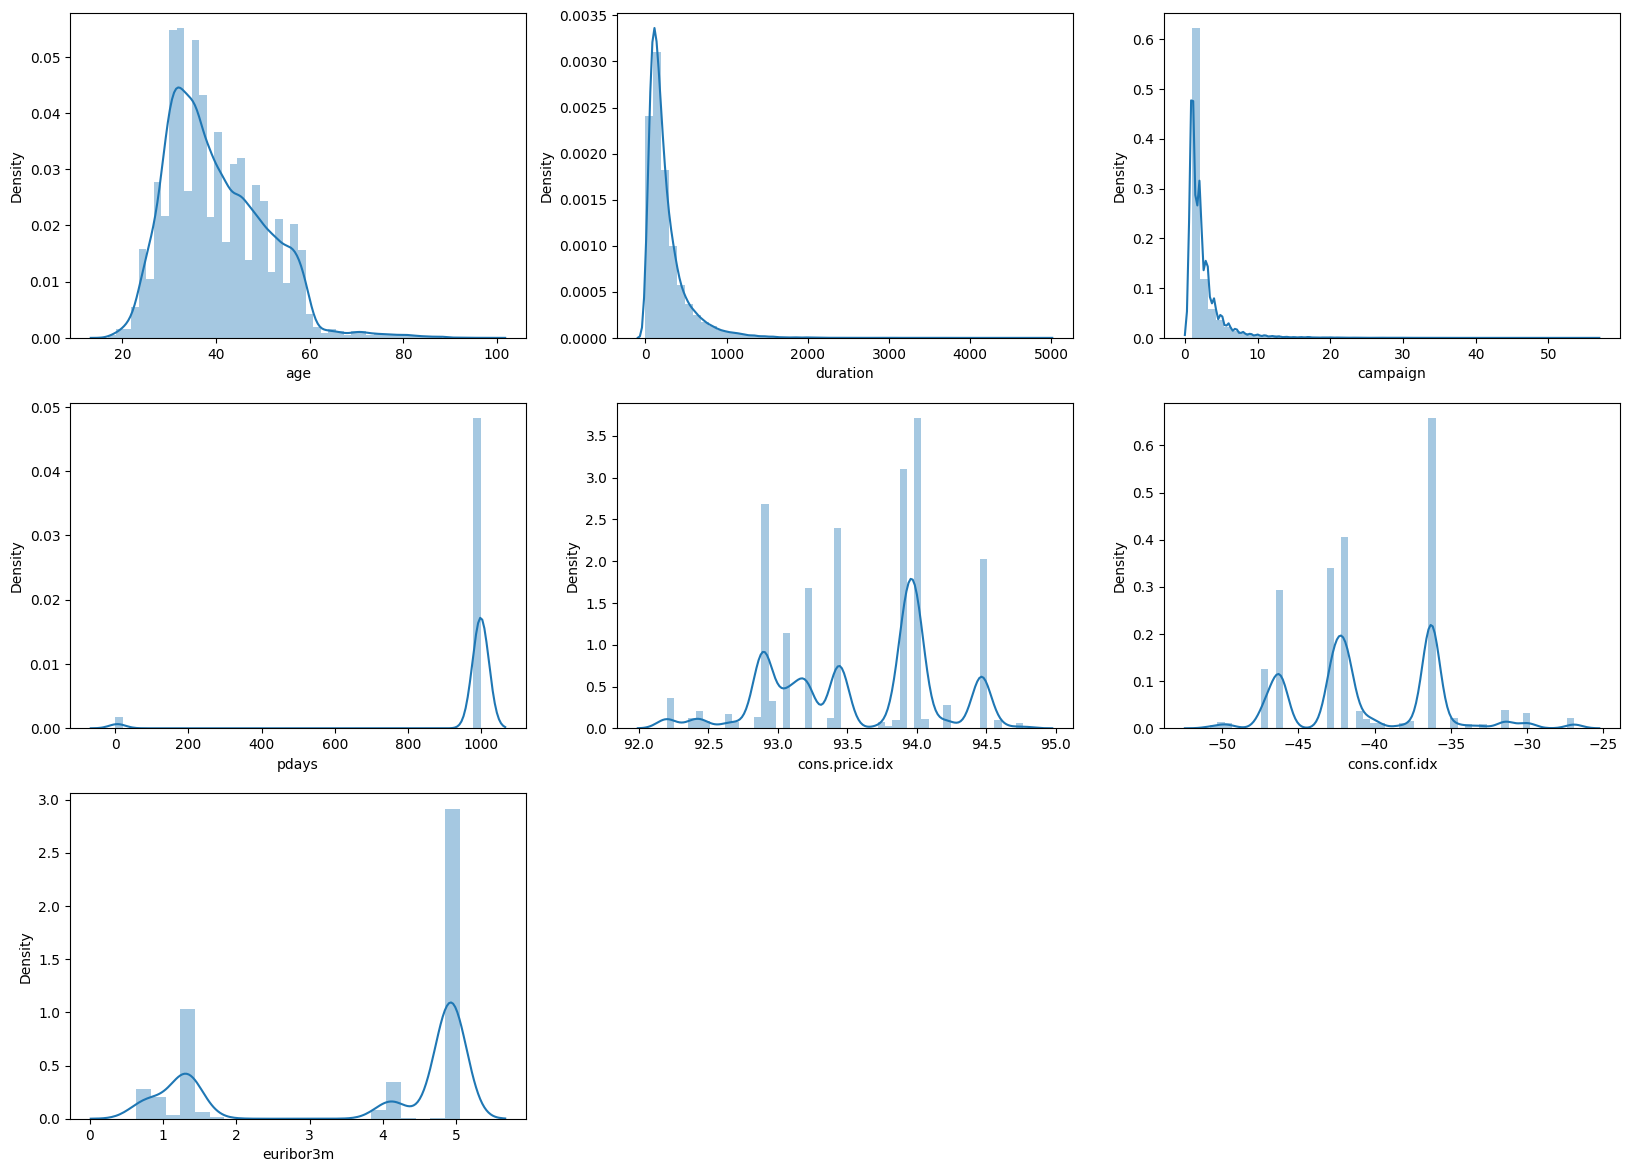

In [14]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]

#plotting a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

- it seems age, price index,conf index distributed normally
- duration, compaign, pdays, previous,etc heavely skewed towards left and seems to be have some outliers.

In [15]:
continuous_features.append('previous')
continuous_features

['age',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'previous']

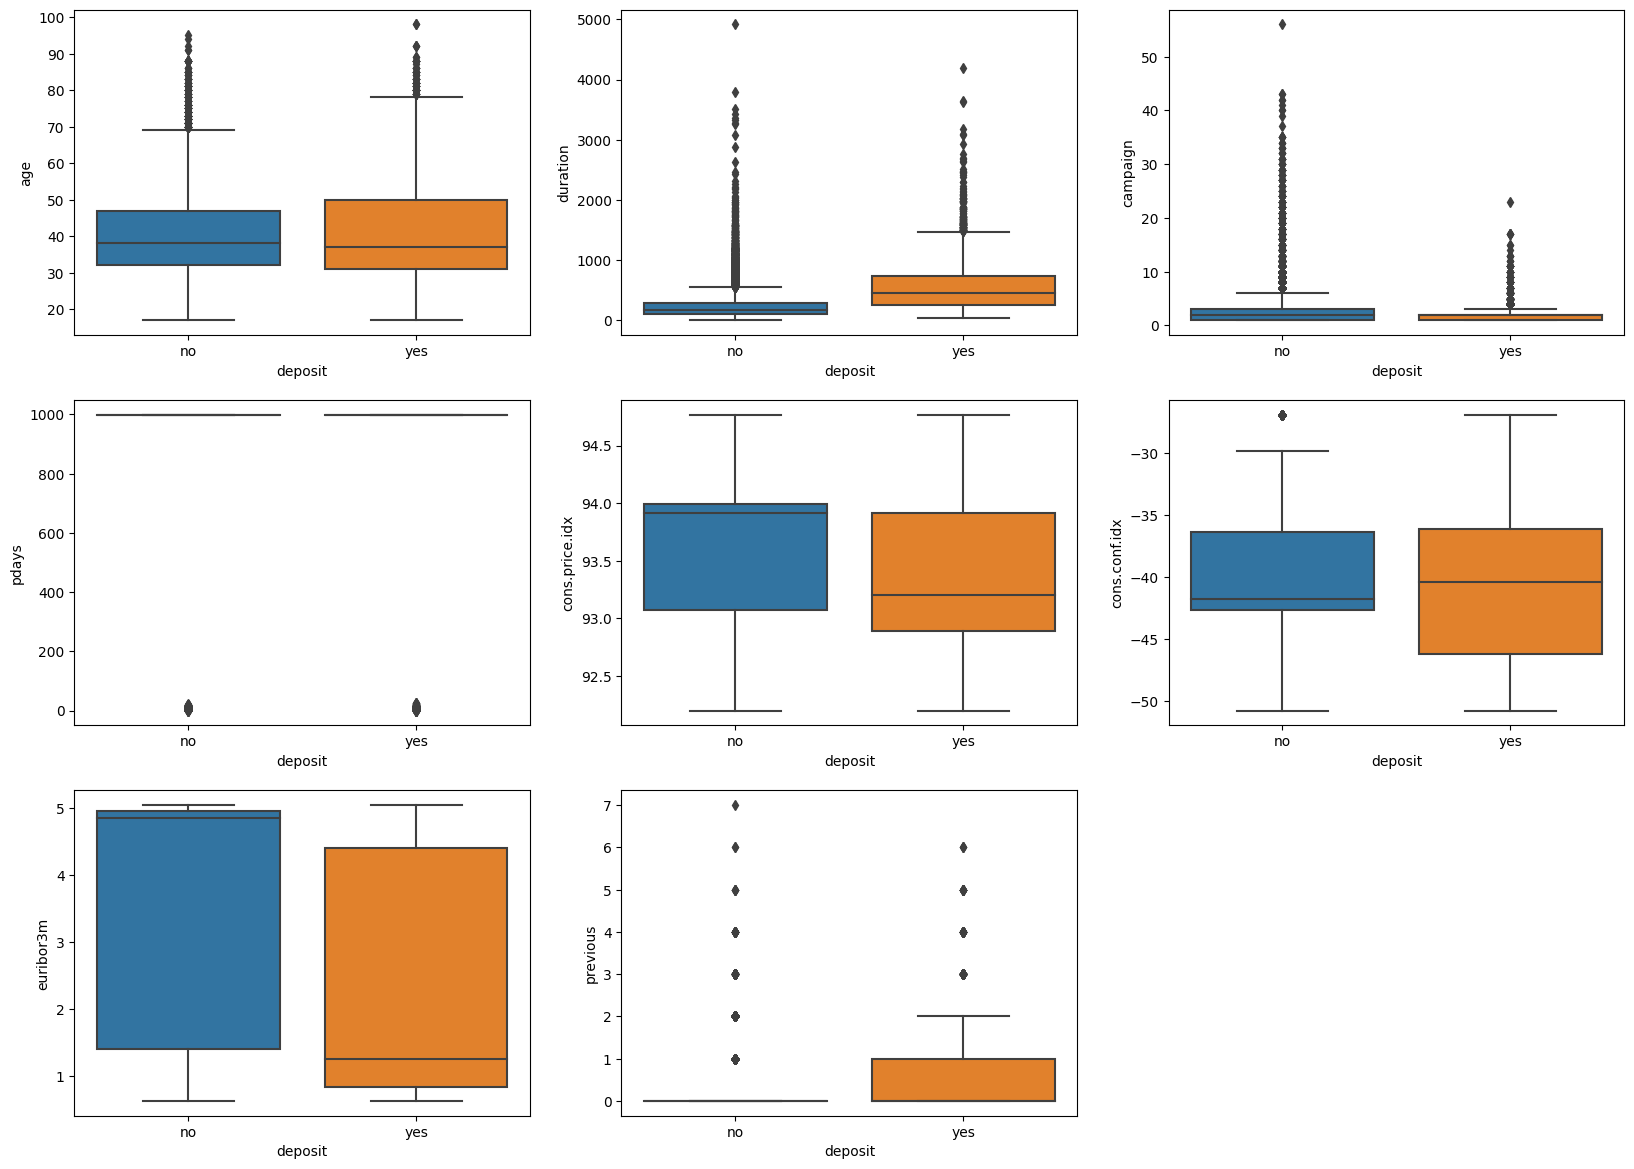

In [16]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel('deposit')
    plotnumber+=1
plt.show()

🟣 age, pdays and previous has some outliers.
🟣 to understand graph is an art, and not everyone is an artist !.

## lets transform & clean the data

In [17]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


🟣first we will change yes in y column.

In [18]:
df['y'].replace('yes',1, inplace = True)
df['y'].replace('no',0, inplace = True)

In [19]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


🟣currently we are removing default column. the reason is :-
Imbalance: Looking at the 'default' column, there's a significant class imbalance. The majority of entries are 'no' for both 'deposit' and 'default', making it difficult for a model to learn meaningful patterns.

Low Frequency: The 'yes' values for 'default' are quite infrequent, especially when considering the 'yes' class of the 'deposit' target. This can result in the model struggling to generalize from such sparse data.

later on we will check by putting it to our model

In [20]:
defaultremove=df['default']

In [21]:
# df.drop('default',axis=1,inplace=True)

In [22]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


🟣 pdays previous contact to client

In [23]:
df1.groupby(['y','pdays']).size()

y    pdays
no   0            5
     1           18
     2           24
     3          141
     4           55
     5           17
     6          123
     7           20
     8            6
     9           29
     10          22
     11          13
     12          32
     13           8
     14           9
     15           8
     16           5
     17           6
     18           3
     19           2
     20           1
     22           1
     999      36000
yes  0           10
     1            8
     2           37
     3          298
     4           63
     5           29
     6          289
     7           40
     8           12
     9           35
     10          30
     11          15
     12          26
     13          28
     14          11
     15          16
     16           6
     17           2
     18           4
     19           1
     21           2
     22           2
     25           1
     26           1
     27           1
     999       3673
dtype: in

🟣 converting 999 to one column with 1 value and rest other values to 2nd column with their respected numberic values as it is.

In [24]:
df['pdays_no_contact'] = df['pdays'].apply(lambda x: 1 if x == 999 else 0)
df['pdays_numeric'] = df['pdays'].apply(lambda x: x if x != 999 else 0)
df.drop('pdays', axis=1, inplace=True)

In [25]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_no_contact,pdays_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0


🟣campaign

In [26]:
df.groupby(['y','campaign'],sort=True)['campaign'].count()

y  campaign
0  1           15342
   2            9359
   3            4767
   4            2402
   5            1479
   6             904
   7             591
   8             383
   9             266
   10            213
   11            165
   12            122
   13             88
   14             68
   15             49
   16             51
   17             54
   18             33
   19             26
   20             30
   21             24
   22             17
   23             15
   24             15
   25              8
   26              8
   27             11
   28              8
   29             10
   30              7
   31              7
   32              4
   33              4
   34              3
   35              5
   37              1
   39              1
   40              2
   41              1
   42              2
   43              2
   56              1
1  1            2300
   2            1211
   3             574
   4             249
   5             120
 

In [27]:
# 🟣removing some outliers
df=df[(df['y'] != 1) | (df['campaign'] <= 17)]
df=df[(df['y'] != 0) | (df['campaign'] <= 44)]

In [28]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_no_contact,pdays_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0


In [29]:
df.dtypes

age                   int64
job                  object
marital              object
education            object
default              object
housing              object
loan                 object
contact              object
month                object
day_of_week          object
duration              int64
campaign              int64
previous              int64
poutcome             object
emp.var.rate        float64
cons.price.idx      float64
cons.conf.idx       float64
euribor3m           float64
nr.employed         float64
y                     int64
pdays_no_contact      int64
pdays_numeric         int64
dtype: object

#previous

In [30]:
df.groupby(['y','previous'],sort=True)['previous'].count()

y  previous
0  0           32421
   1            3594
   2             404
   3              88
   4              32
   5               5
   6               2
   7               1
1  0            3140
   1             967
   2             350
   3             128
   4              38
   5              13
   6               3
Name: previous, dtype: int64

🟣contact

In [31]:
df['contact'].replace('telephone',0, inplace = True)
df['contact'].replace('cellular',1, inplace = True)

In [32]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_no_contact,pdays_numeric
0,56,housemaid,married,basic.4y,no,no,no,0,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
1,57,services,married,high.school,unknown,no,no,0,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,37,services,married,high.school,no,yes,no,0,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,0,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,56,services,married,high.school,no,no,yes,0,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0
41184,46,blue-collar,married,professional.course,no,no,no,1,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41185,56,retired,married,university.degree,no,yes,no,1,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41186,44,technician,married,professional.course,no,no,no,1,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0


🟣dayofweek & month

In [33]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [34]:
day_dict={'thu':4,'mon':1,'wed':3,'tue':2,'fri':5}
df['day_of_week']= df['day_of_week'].map(day_dict)
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df['month']= df['month'].map(month_dict)

In [35]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_no_contact,pdays_numeric
0,56,housemaid,married,basic.4y,no,no,no,0,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
1,57,services,married,high.school,unknown,no,no,0,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,37,services,married,high.school,no,yes,no,0,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,0,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,56,services,married,high.school,no,no,yes,0,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0
41184,46,blue-collar,married,professional.course,no,no,no,1,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41185,56,retired,married,university.degree,no,yes,no,1,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41186,44,technician,married,professional.course,no,no,no,1,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0


🟣housing, loan

In [36]:
dictionary = {'yes': 1, 'no': 0, 'unknown': -1}

df['housing'].replace(dictionary, inplace=True)
df['loan'].replace(dictionary, inplace=True)
df['default'].replace(dictionary, inplace=True)

In [37]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_no_contact,pdays_numeric
0,56,housemaid,married,basic.4y,0,0,0,0,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
1,57,services,married,high.school,-1,0,0,0,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,37,services,married,high.school,0,1,0,0,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,admin.,married,basic.6y,0,0,0,0,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,56,services,married,high.school,0,0,1,0,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,1,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0
41184,46,blue-collar,married,professional.course,0,0,0,1,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41185,56,retired,married,university.degree,0,1,0,1,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41186,44,technician,married,professional.course,0,0,0,1,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0


🟣poutcome

In [38]:
# dummy_outcome=pd.get_dummies(df['poutcome'], prefix='poutcome')
# df = pd.concat([df,dummy_outcome],axis=1)
# df.drop(['poutcome'],axis=1, inplace=True)
dictionary = {'success': 1, 'failure': 0, 'nonexistent': -1}

df['poutcome'].replace(dictionary, inplace=True)

In [39]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_no_contact,pdays_numeric
0,56,housemaid,married,basic.4y,0,0,0,0,5,1,...,0,-1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
1,57,services,married,high.school,-1,0,0,0,5,1,...,0,-1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,37,services,married,high.school,0,1,0,0,5,1,...,0,-1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,admin.,married,basic.6y,0,0,0,0,5,1,...,0,-1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,56,services,married,high.school,0,0,1,0,5,1,...,0,-1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,1,11,5,...,0,-1,-1.1,94.767,-50.8,1.028,4963.6,1,1,0
41184,46,blue-collar,married,professional.course,0,0,0,1,11,5,...,0,-1,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41185,56,retired,married,university.degree,0,1,0,1,11,5,...,0,-1,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41186,44,technician,married,professional.course,0,0,0,1,11,5,...,0,-1,-1.1,94.767,-50.8,1.028,4963.6,1,1,0


In [40]:
data=df.copy()

In [41]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

🟣job,marital,education

In [42]:
cat_columns = ['job', 'marital', 'education']
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col, prefix_sep='_', dummy_na=False)], axis=1)

In [43]:
df

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,0,0,0,0,5,1,261,1,0,...,0,0,1,0,0,0,0,0,0,0
1,57,-1,0,0,0,5,1,149,1,0,...,0,0,0,0,0,1,0,0,0,0
2,37,0,1,0,0,5,1,226,1,0,...,0,0,0,0,0,1,0,0,0,0
3,40,0,0,0,0,5,1,151,1,0,...,0,0,0,1,0,0,0,0,0,0
4,56,0,0,1,0,5,1,307,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,1,11,5,334,1,0,...,0,0,0,0,0,0,0,1,0,0
41184,46,0,0,0,1,11,5,383,1,0,...,0,0,0,0,0,0,0,1,0,0
41185,56,0,1,0,1,11,5,189,2,0,...,0,0,0,0,0,0,0,0,1,0
41186,44,0,0,0,1,11,5,442,1,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
df.dtypes

age                                int64
default                            int64
housing                            int64
loan                               int64
contact                            int64
month                              int64
day_of_week                        int64
duration                           int64
campaign                           int64
previous                           int64
poutcome                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
pdays_no_contact                   int64
pdays_numeric                      int64
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired     

## Logistic regression

In [45]:
X = df.drop(['y'],axis=1)
y = df['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

🟣 Will create model with logistic regression and decision tree classifier.

In [47]:
from sklearn.linear_model import LogisticRegression

In [88]:
logreg_cv = LogisticRegression(random_state=0)

In [49]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {} %'.format(logreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 91.1143481427531 %


🟣 Above we had not filled unknown values in the columns. so lets fill this values by some way and lets check the accurracy score.

In [50]:
# job,marital,education,
# loan,'housing'

In [51]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [52]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5752,1.0
blue-collar,2318,878,1426,3622,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


In [53]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [54]:
jobhousing=cross_tab(data,'job','housing')
jobloan=cross_tab(data,'job','loan')

In [55]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5752,1.0
blue-collar,2366.0,878,1448.0,3653.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


In [56]:
cross_tab(data,'job','housing')

,0,1,-1
job,,,
admin.,4636,5559,226
blue-collar,4361,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,789,908,44
self-employed,641,740,40
services,1818,2050,101
student,381,471,23


In [57]:
def fillhousing(df,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=[0,1]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']== -1),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j][0])/(jobhousing.loc[j][0]+jobhousing.loc[j][1]))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]=0
        df.loc[ind2,"housing"]=1
    return df

In [58]:
data=fillhousing(data,jobhousing)

In [59]:
cross_tab(data,'job','housing')

,0,1,-1
job,,,
admin.,4739,5682,0.0
blue-collar,4475,4879,0.0
entrepreneur,659,797,0.0
housemaid,501,559,0.0
management,1399,1525,0.0
retired,804,937,0.0
self-employed,657,764,0.0
services,1865,2104,0.0
student,391,484,0.0


In [60]:
cross_tab(data,'job','loan')

,0,1,-1
job,,,
admin.,8485,1710,226
blue-collar,7729,1384,241
entrepreneur,1214,206,36
housemaid,877,154,29
management,2414,439,71
retired,1452,245,44
self-employed,1186,195,40
services,3267,601,101
student,710,142,23


In [61]:
def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=[0,1]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']==-1),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j][0])/(jobloan.loc[j][0]+jobloan.loc[j][1]))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]=0
        df.loc[ind2,"loan"]=1
    return df

In [62]:
data=fillloan(data,jobloan)

In [63]:
cross_tab(data,'job','loan')

,0,1,-1
job,,,
admin.,8661,1760,0.0
blue-collar,7936,1418,0.0
entrepreneur,1241,215,0.0
housemaid,901,159,0.0
management,2477,447,0.0
retired,1488,253,0.0
self-employed,1217,204,0.0
services,3351,618,0.0
student,729,146,0.0


In [64]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_no_contact,pdays_numeric
0,56,housemaid,married,basic.4y,0,0,0,0,5,1,...,0,-1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
1,57,services,married,high.school,-1,0,0,0,5,1,...,0,-1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
2,37,services,married,high.school,0,1,0,0,5,1,...,0,-1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
3,40,admin.,married,basic.6y,0,0,0,0,5,1,...,0,-1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
4,56,services,married,high.school,0,0,1,0,5,1,...,0,-1,1.1,93.994,-36.4,4.857,5191.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,1,11,5,...,0,-1,-1.1,94.767,-50.8,1.028,4963.6,1,1,0
41184,46,blue-collar,married,professional.course,0,0,0,1,11,5,...,0,-1,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41185,56,retired,married,university.degree,0,1,0,1,11,5,...,0,-1,-1.1,94.767,-50.8,1.028,4963.6,0,1,0
41186,44,technician,married,professional.course,0,0,0,1,11,5,...,0,-1,-1.1,94.767,-50.8,1.028,4963.6,1,1,0


In [65]:
data.dtypes

age                   int64
job                  object
marital              object
education            object
default               int64
housing               int64
loan                  int64
contact               int64
month                 int64
day_of_week           int64
duration              int64
campaign              int64
previous              int64
poutcome              int64
emp.var.rate        float64
cons.price.idx      float64
cons.conf.idx       float64
euribor3m           float64
nr.employed         float64
y                     int64
pdays_no_contact      int64
pdays_numeric         int64
dtype: object

In [66]:
cat_columns = ['job', 'marital', 'education']
for col in  cat_columns:
    data = pd.concat([data.drop(col, axis=1),pd.get_dummies(data[col], prefix=col, prefix_sep='_', dummy_na=False)], axis=1)

In [67]:
data

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,0,0,0,0,5,1,261,1,0,...,0,0,1,0,0,0,0,0,0,0
1,57,-1,0,0,0,5,1,149,1,0,...,0,0,0,0,0,1,0,0,0,0
2,37,0,1,0,0,5,1,226,1,0,...,0,0,0,0,0,1,0,0,0,0
3,40,0,0,0,0,5,1,151,1,0,...,0,0,0,1,0,0,0,0,0,0
4,56,0,0,1,0,5,1,307,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,1,11,5,334,1,0,...,0,0,0,0,0,0,0,1,0,0
41184,46,0,0,0,1,11,5,383,1,0,...,0,0,0,0,0,0,0,1,0,0
41185,56,0,1,0,1,11,5,189,2,0,...,0,0,0,0,0,0,0,0,1,0
41186,44,0,0,0,1,11,5,442,1,0,...,0,0,0,0,0,0,0,1,0,0


## Split Dataset into Training set and Test set

In [68]:
X = data.drop(['y'],axis=1)
y = data['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logreg_cv = LogisticRegression(random_state=0)

In [71]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {} %'.format(logreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 91.13862588006798 %


🟣 As we can see the accurracy is slightly increased.

In [72]:
df.dtypes

age                                int64
default                            int64
housing                            int64
loan                               int64
contact                            int64
month                              int64
day_of_week                        int64
duration                           int64
campaign                           int64
previous                           int64
poutcome                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
pdays_no_contact                   int64
pdays_numeric                      int64
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired     

In [73]:
# cor_mat=data.corr()
# fig = plt.figure(figsize=(30,30))
# sns.heatmap(cor_mat,annot=True)

🟣if we remove 'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'

In [74]:
X = data.drop(['y','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)
y = data['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [75]:
logreg_cv = LogisticRegression(random_state=0)
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {} %'.format(logreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 90.55596018451081 %


🟣 Removing the column leads to accurracy decrease. bad decision !

## decison tree classifier

In [76]:
#Importing Decision tree Library
from sklearn.tree import DecisionTreeClassifier

In [77]:
#Building Decision Tree Classifier Model
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [78]:
#Function to compute Confusion Matrix,Classification Report and to generate training and testing scores

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print("\nAccuracy Score : ",acc)
    cm = confusion_matrix(y_test,y_pred)
    print("\nConfusion Matrix : ",cm)
    print("\nClassification report\n",classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print("\nTraining Score : ",train_score)
    print("\nTesting Score : ",test_score)

In [79]:
#Evaluating Training and Testing Accuracy
mscore(dt)


Training Score :  0.9093419934442152

Testing Score :  0.9130857004127215


In [80]:
#Generating Predictions
ypred_dt = dt.predict(X_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [81]:
#Evaluate the Model ---- Confusion Matrix , Classification report , Accuracy
eval_model(y_test,ypred_dt)


Accuracy Score :  0.9130857004127215

Confusion Matrix :  [[7217  137]
 [ 579  305]]

Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7354
           1       0.69      0.35      0.46       884

    accuracy                           0.91      8238
   macro avg       0.81      0.66      0.71      8238
weighted avg       0.90      0.91      0.90      8238



In [82]:
#Plotting Decision Tree
from sklearn.tree import plot_tree

cn = ['no','yes'] #class names
fn = X_train.columns #feature names
print(cn)
print(fn)

['no', 'yes']
Index(['age', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'previous', 'poutcome', 'pdays_no_contact',
       'pdays_numeric', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown'],
      dtype='object')


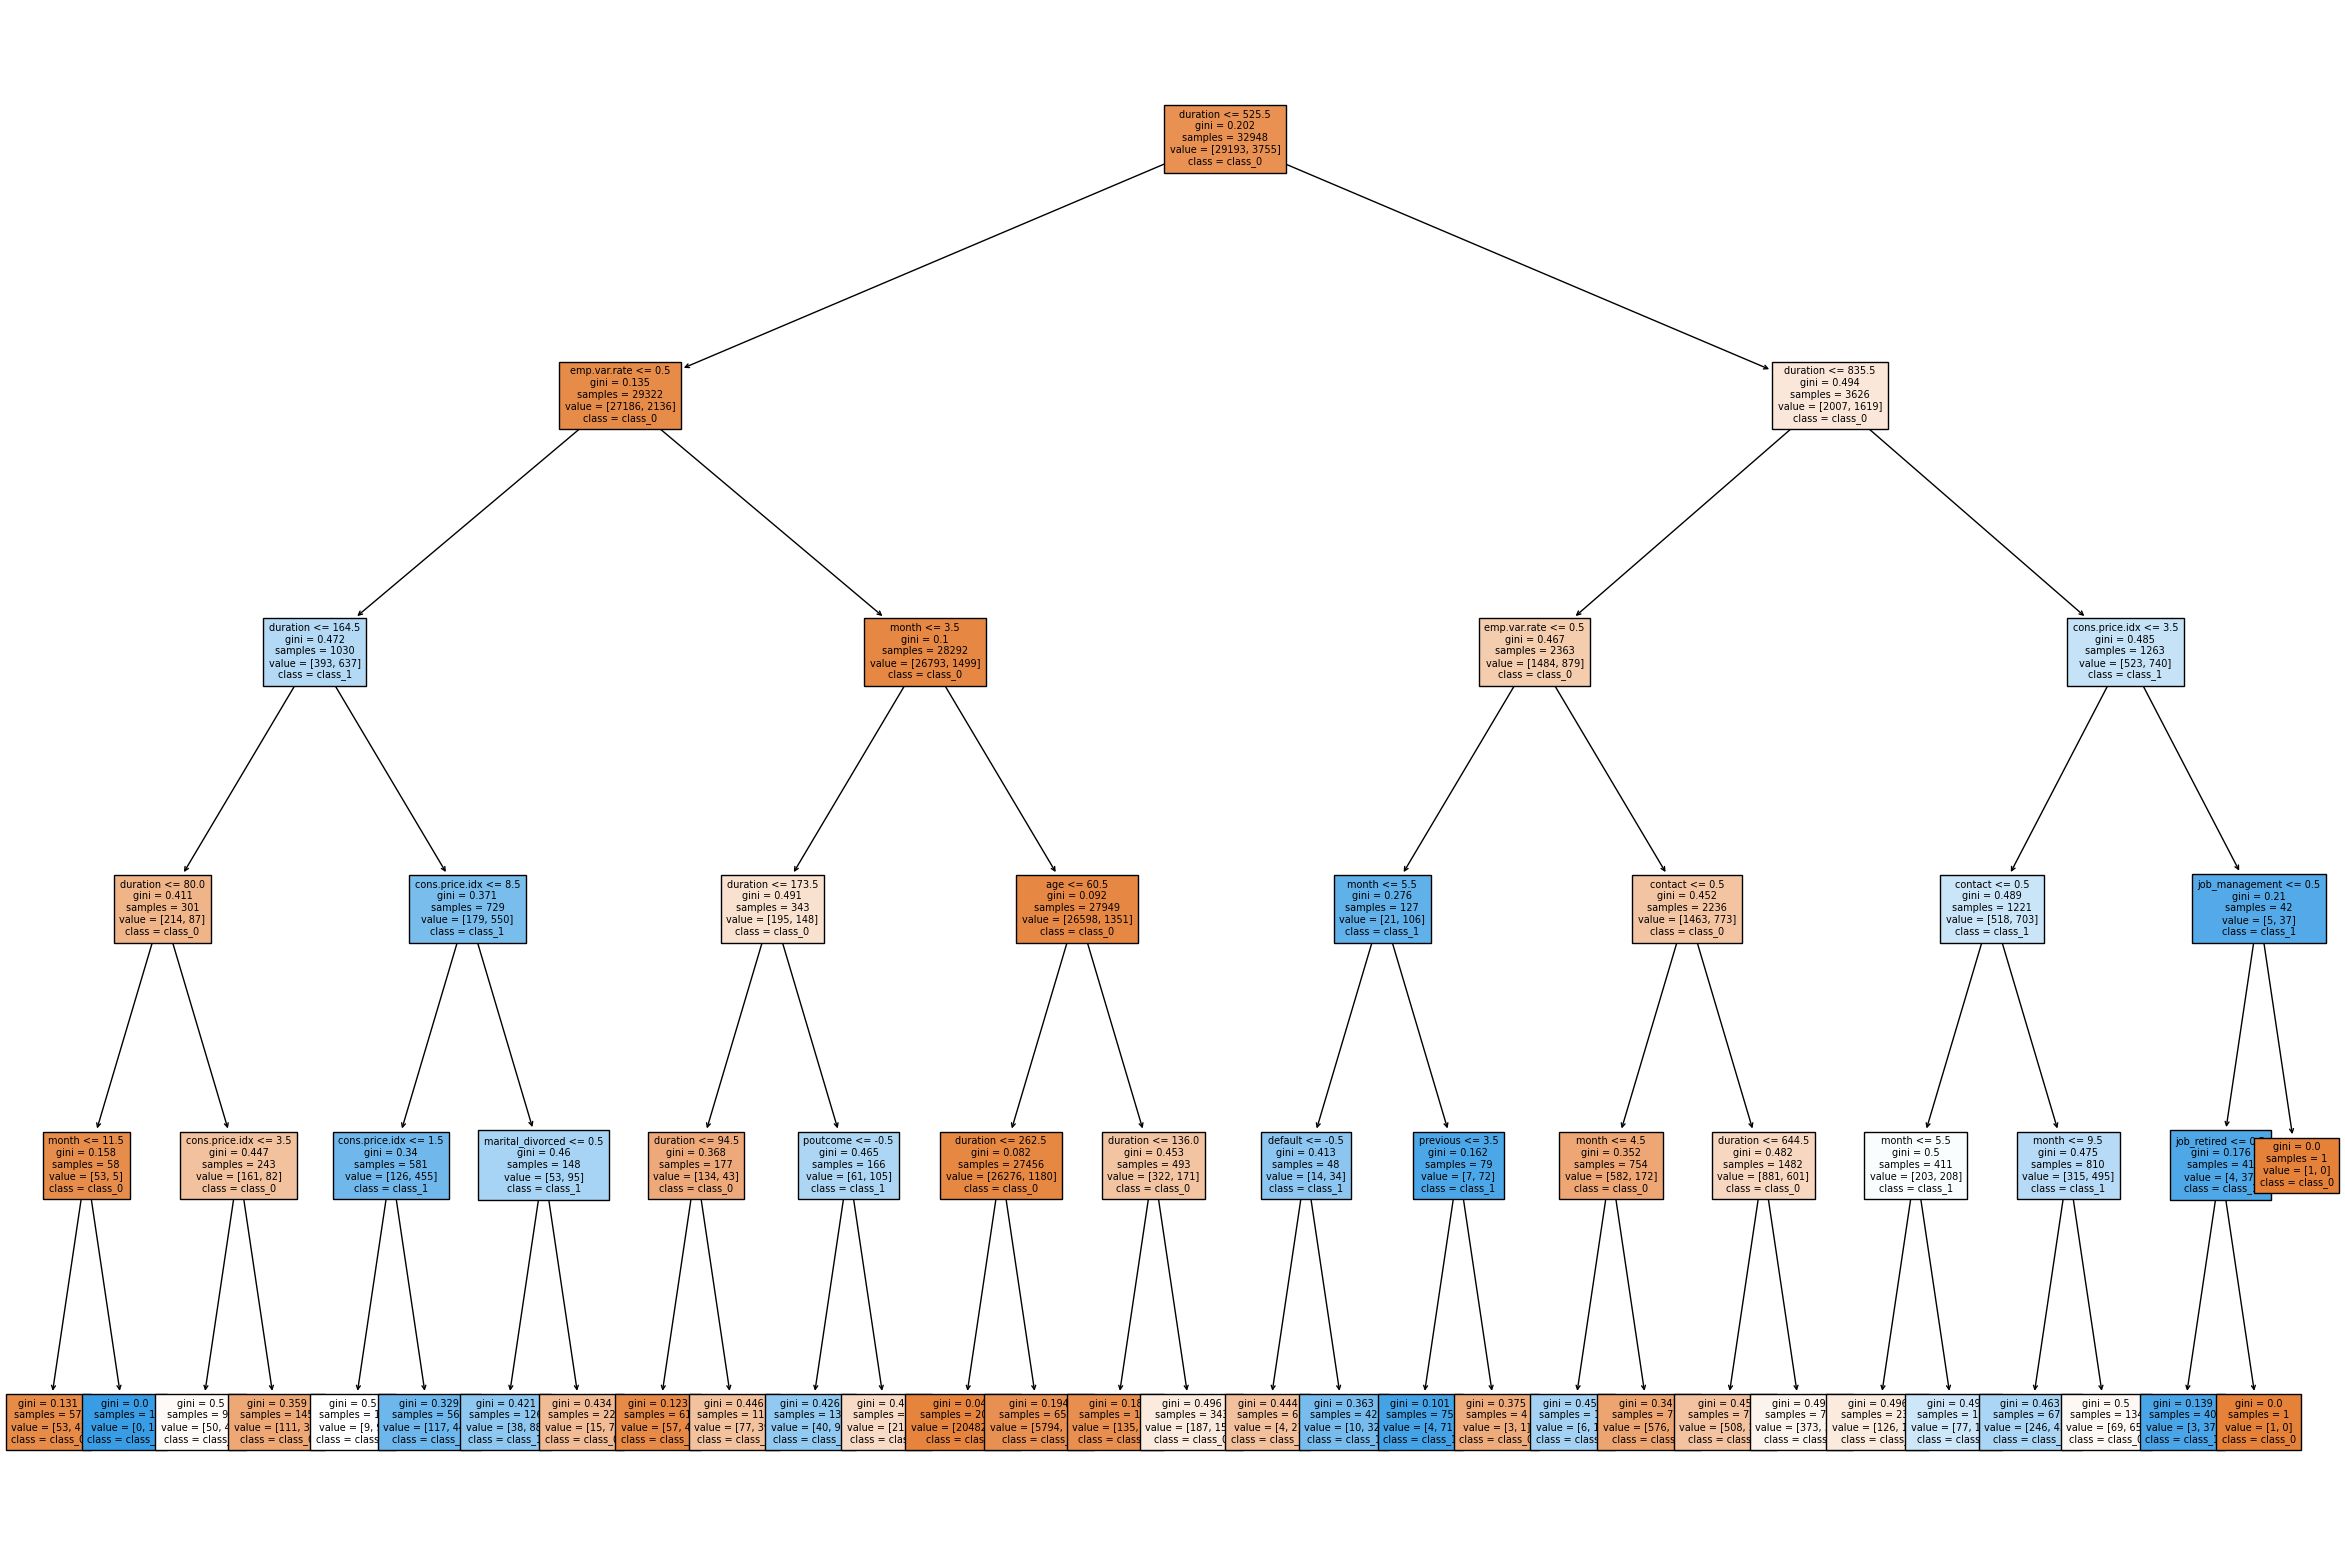

In [83]:
feature_names = df.columns.tolist()
class_names = ["class_0","class_1"]
plt.figure(figsize = (30,20))
plot_tree(dt,feature_names=feature_names,class_names=class_names,filled = True,fontsize = 7)
plt.show()

## Decision Tree Classifier 2 (using Entropy Criteria)

In [84]:
#Building Decision Tree Classifier Model
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(X_train,y_train)
#Evaluating Training and Testing Accuracy
mscore(dt1)


Training Score :  0.9053660313220833

Testing Score :  0.9102937606215101


In [85]:
#Generating Predictions
ypred_dt1 = dt1.predict(X_test)
print(ypred_dt1)

[0 0 0 ... 0 0 0]


In [86]:
#Evaluate the Model ---- Confusion Matrix , Classification report , Accuracy
eval_model(y_test,ypred_dt1)


Accuracy Score :  0.9102937606215101

Confusion Matrix :  [[7177  177]
 [ 562  322]]

Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7354
           1       0.65      0.36      0.47       884

    accuracy                           0.91      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238



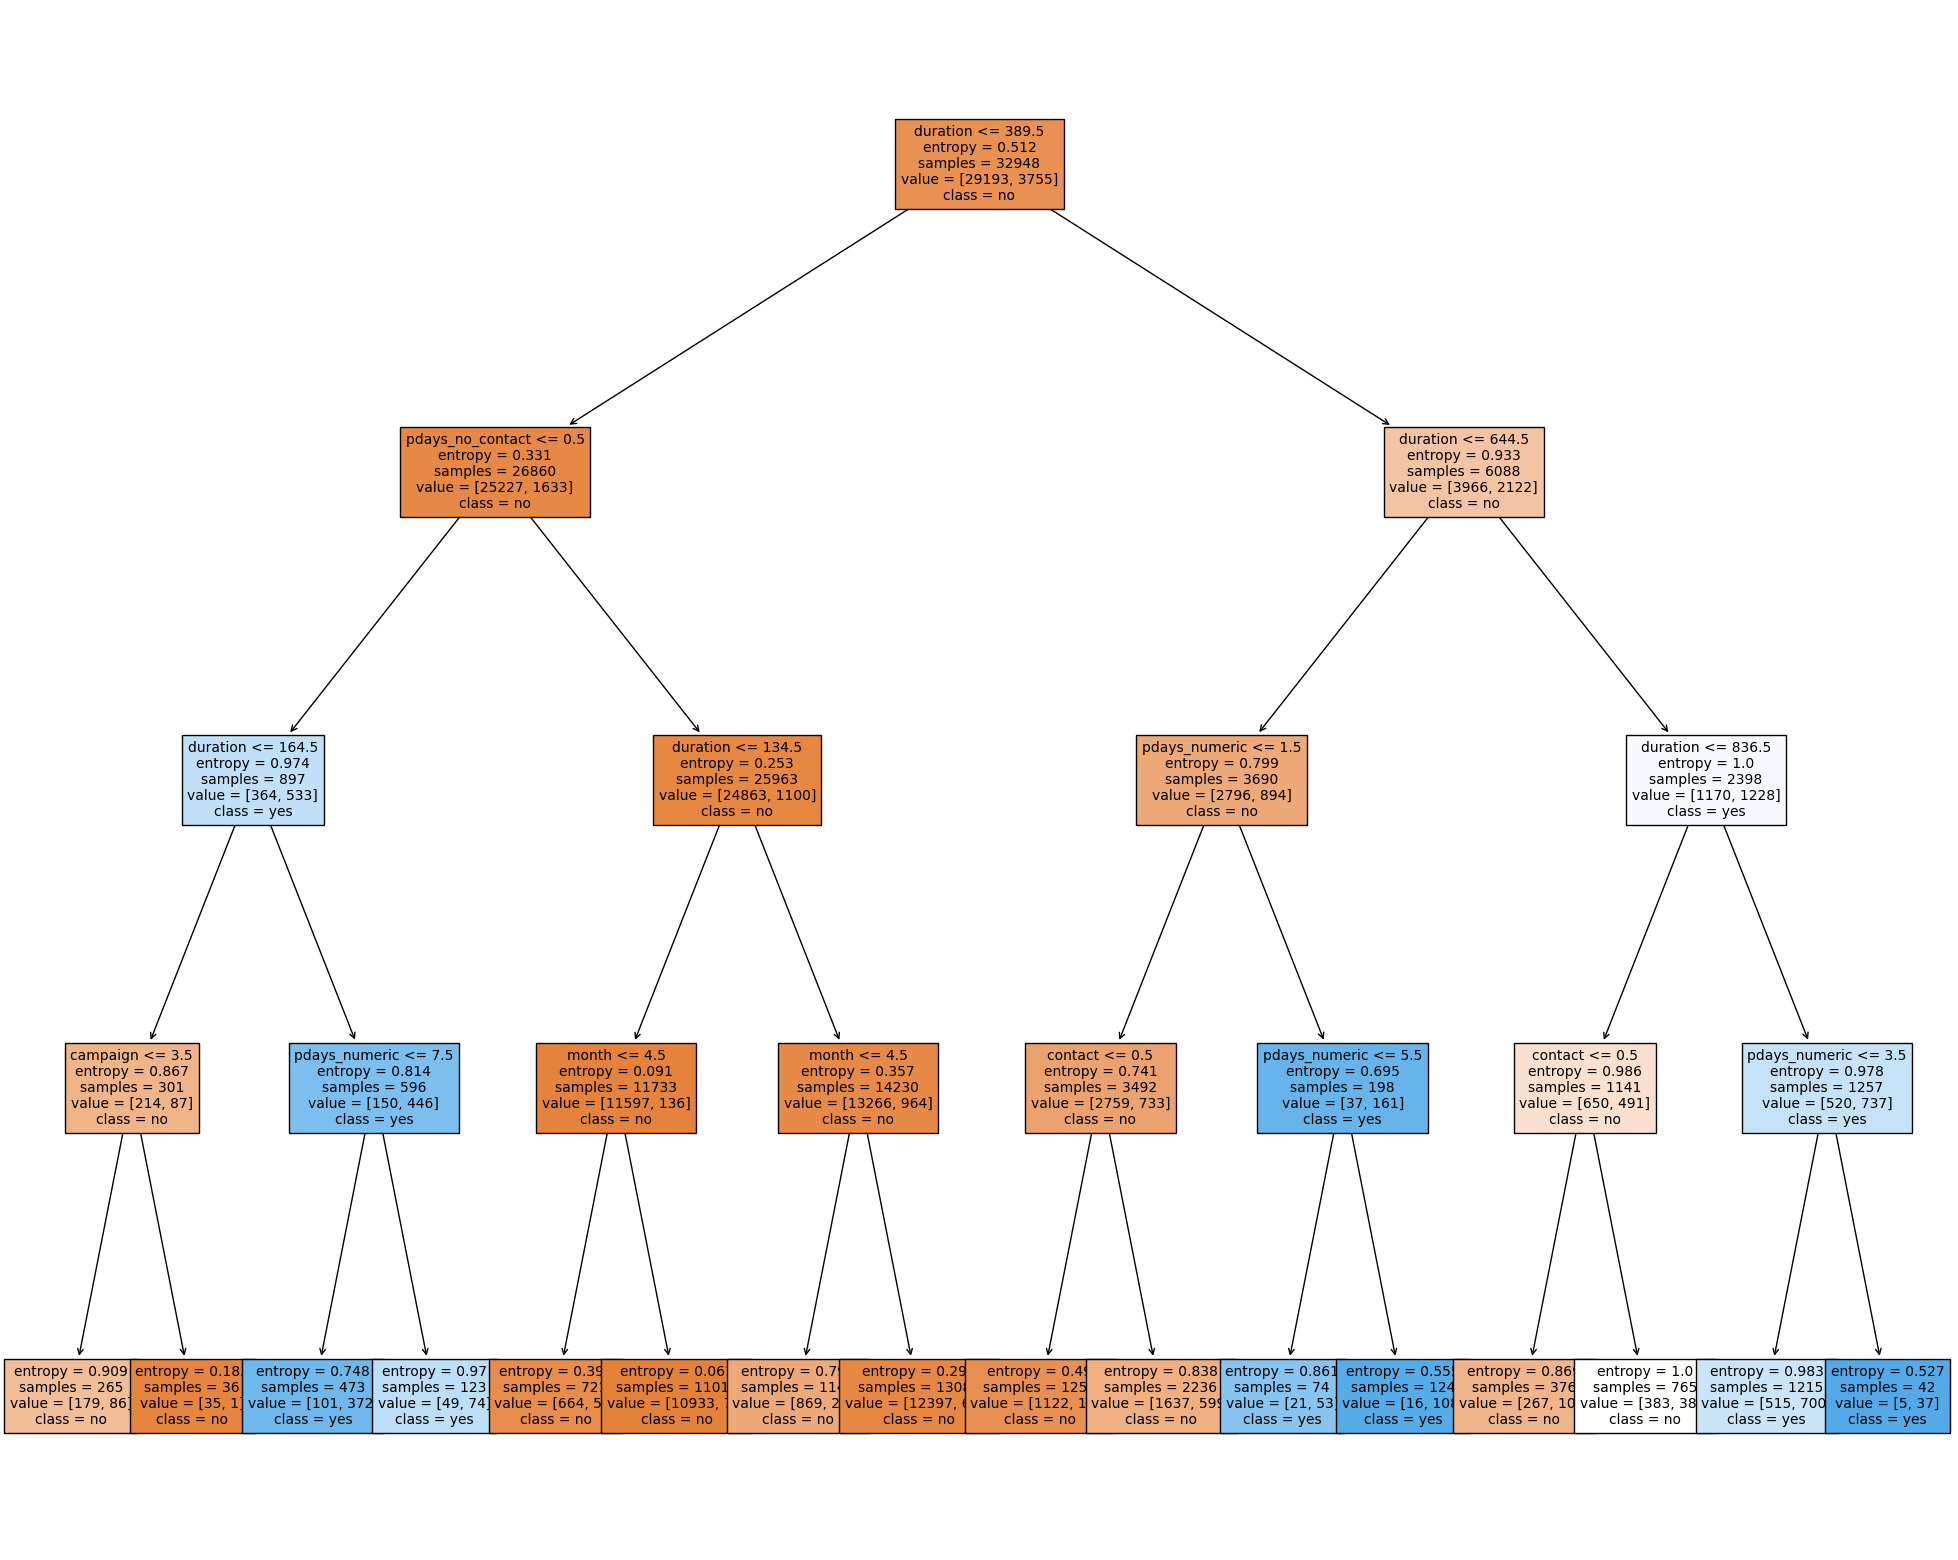

In [87]:
#Plotting Decision classifier tree
plt.figure(figsize = (25,20))
plot_tree(dt1,feature_names=fn.tolist(),class_names=cn,filled = True,fontsize = 10)
plt.show()